Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

Linear Regression Coefficients: [-64.41652232 118.82568233  61.44395972  59.00775952  38.44306102]
Ridge Regression Coefficients: [-0.78633596 54.68169355 60.55879833 57.7175623  38.11412204]


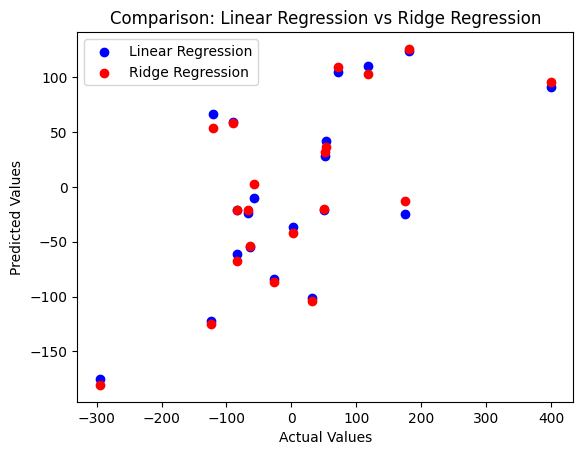

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

X[:, 1] = X[:, 0] + np.random.normal(0, 0.1, size=X[:, 0].shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

ridge_regressor = Ridge(alpha=1)
ridge_regressor.fit(X_train, y_train)

print("Linear Regression Coefficients:", linear_regressor.coef_)
print("Ridge Regression Coefficients:", ridge_regressor.coef_)

linear_preds = linear_regressor.predict(X_test)
ridge_preds = ridge_regressor.predict(X_test)

plt.scatter(y_test, linear_preds, color='blue', label='Linear Regression')
plt.scatter(y_test, ridge_preds, color='red', label='Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Comparison: Linear Regression vs Ridge Regression')
plt.show()


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

Lasso Regression Coefficients: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.23468160e+01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  4.16259212e+01  6.49469208e+01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.89004770e+01 -0.00000000e+00
  0.00000000e+00  7.17786439e-03  0.00000000e+00  2.46392102e+01
  2.85248009e+01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  4.59526260e+01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  7.17718575e+00  0.00000000e+00
  6.43867163e+01  1.66888173e+01]
Number of non-zero coefficients: 11


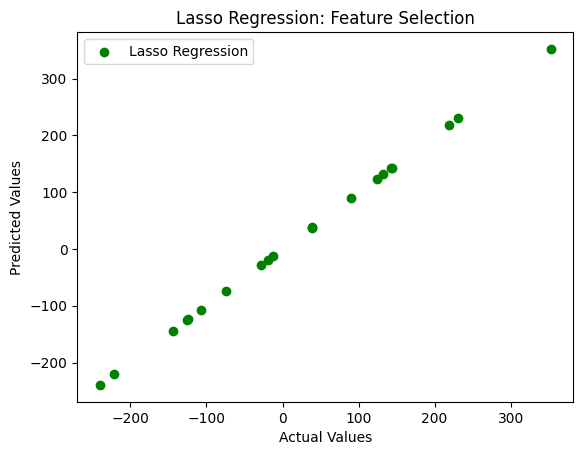

In [ ]:
# Write your code here
from sklearn.linear_model import Lasso

X, y = make_regression(n_samples=100, n_features=50, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)

print("Lasso Regression Coefficients:", lasso_regressor.coef_)

non_zero_coeffs = np.sum(lasso_regressor.coef_ != 0)
print(f"Number of non-zero coefficients: {non_zero_coeffs}")

lasso_preds = lasso_regressor.predict(X_test)

plt.scatter(y_test, lasso_preds, color='green', label='Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Lasso Regression: Feature Selection')
plt.show()



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

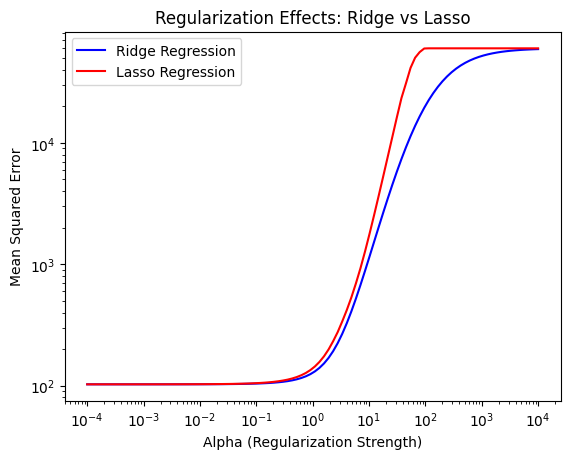

In [3]:
# Write your code here
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 4, 100)

ridge_errors = []
lasso_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_preds = ridge_model.predict(X_test)
    ridge_errors.append(mean_squared_error(y_test, ridge_preds))
    
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_preds = lasso_model.predict(X_test)
    lasso_errors.append(mean_squared_error(y_test, lasso_preds))

plt.plot(alphas, ridge_errors, label='Ridge Regression', color='blue')
plt.plot(alphas, lasso_errors, label='Lasso Regression', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Regularization Effects: Ridge vs Lasso')
plt.legend()
plt.show()
